# Advantage of relaxed SP definition

In this experiment, for a synthetic data set with a subset of designed SP and a number of spurrious (and very weak) SP occurences, we will show that our framework for a relaxed definition allows us to differentiate between the two groups of occurences

In [4]:
import pandas as pd
import wiggum as wg
import numpy as np
import string
import random
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

For our evaluations, we will need a few different types of trend objects. The package provides dictionaries of default trend lists for ease of use of default settings

In [6]:
wg.default_binary_trends

{'binary_rank': wiggum.trends.Binary_Mean_Rank_Trend,
 'binary_sign': wiggum.trends.Binary_Pearson_Trend}

In [7]:
wg.default_distance_trends

{'rank_trend': wiggum.trends.Mean_Rank_Trend,
 'lin_reg': wiggum.trends.Linear_Trend}

In [8]:
# make a list of initialized objects from each
binary_trend_objs = [trend() for trend in wg.default_binary_trends.values()]
distance_trend_objs = [trend() for trend in wg.default_distance_trends.values()]
# print one to see that it's a list of initialized objects
binary_trend_objs

## Regression SP

First, we load a dataset as a labeledDataFrame object that has a number of continuous type regressions.  We will load it twice, one for the detection only case and one for the case with a continuous-valued distance. 

In [10]:
# file = '../data/synthetic_continuous16'
file = '../data/synthetic_continuous_bin_compare3'
# labeled_df_bin = wg.labeledDataFrame(file)
# labeled_df_dist = wg.labeledDataFrame(file)

labeled_df = wg.LabeledDataFrame(file)

Next we compute the trends using only the binary types and view a sample of 10 random trends

In [11]:
view_sample_bin = labeled_df.get_subgroup_trends_1lev(binary_trend_objs).sample(10)
view_sample_bin

,feat1,feat2,subgroup_trend,subgroup_trend_strength,subgroup,group_feat,trend_type,agg_trend,agg_trend_strength
907,x2,x16,positive,0.284922,C3,C,binary_sign,positive,0.050084
2916,x8,x16,negative,0.037278,A4,A,binary_sign,positive,0.021597
3612,x12,x15,positive,0.055776,H1,H,binary_sign,positive,0.040388
10,x1,x2,negative,0.265312,C2,C,binary_sign,negative,0.314063
3326,x10,x15,positive,0.010562,H3,H,binary_sign,negative,0.039702
1067,x3,x8,positive,0.055189,C3,C,binary_sign,positive,0.016188
2835,x8,x13,negative,0.371256,E1,E,binary_sign,negative,0.126346
762,x2,x11,positive,0.003984,G3,G,binary_sign,positive,0.013949
867,x2,x15,positive,0.007557,A3,A,binary_sign,negative,0.011094
2862,x8,x14,positive,0.024722,D0,D,binary_sign,positive,0.163920


Lets look a little at some of the trends that are found

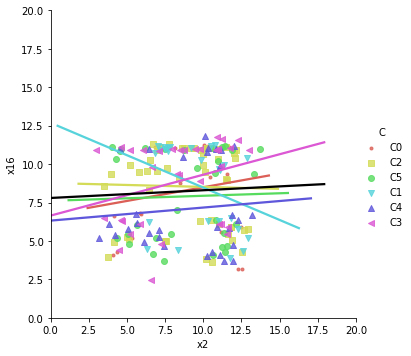

In [12]:
# look at the first of the random selection
view_to_plot = view_sample_bin.loc[view_sample_bin.index[0],['feat1','feat2','group_feat']]

labeled_df.sp_plot(*view_to_plot)

and a view where we know there is strong SP

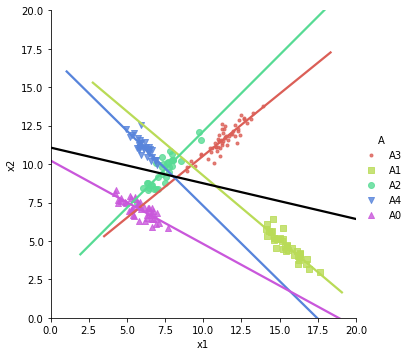

In [13]:

labeled_df.sp_plot('x1','x2','A')

Next we compute the trends using the continuous trends,, and view a sample of 10 random trends

In [15]:
labeled_df.get_subgroup_trends_1lev(distance_trend_objs)
view_sample_dist = labeled_df.get_trend_rows(trend_type=wg.default_distance_trends.keys()).sample(10)
view_sample_dist

15360  total rows meet the criteria


,feat1,feat2,subgroup_trend,subgroup_trend_strength,subgroup,group_feat,trend_type,agg_trend,agg_trend_strength
11731,x5,x13,0.783164,0.051713,C1,C,lin_reg,0.00399891,0.002738
5340,x1,x13,0.00485981,0.004267,D0,D,lin_reg,0.0671937,0.060322
13670,x7,x9,0.0269815,0.105275,E1,E,lin_reg,0.0476557,0.036499
14796,x8,x10,0.00629325,0.007148,B1,B,lin_reg,0.0174722,0.018366
17038,x10,x15,0.0546984,0.038337,B2,B,lin_reg,-0.0631417,0.039702
5417,x1,x14,0.112106,0.056178,F0,F,lin_reg,0.00611014,0.003050
9646,x4,x8,-0.183962,0.326798,G0,G,lin_reg,-0.0150677,0.025296
4038,x1,x3,-0.120407,0.077085,A3,A,lin_reg,0.0335962,0.070384
13775,x7,x10,0.00175057,0.002785,B2,B,lin_reg,-0.00760192,0.014619
6041,x2,x5,-0.0571112,0.201957,C4,C,lin_reg,-0.062117,0.060181


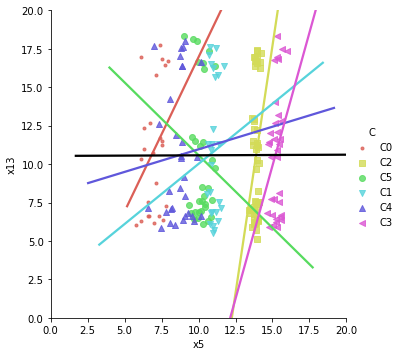

In [16]:
# look at the first of the random selection
view_to_plot = view_sample_dist.loc[view_sample_dist.index[0],['feat1','feat2','group_feat']]

labeled_df.sp_plot(*view_to_plot)

Now, we can filter the results for Simpson's Paradox, using the default setting for each

In [17]:
base_sp = {'name':'binary_SP','distance':0.0}
distance_sp =  {'name':'distance_SP','distance':.2}
quality_sp = {'name':'qualfilter_SP','distance':.2,'agg_trend_strength':.2,'subgroup_trend_strength':0.2}
sp_filter_list = [base_sp, distance_sp, quality_sp]

for sp_filter in sp_filter_list:
    labeled_df.get_SP_rows(sp_filter.copy())

labeled_df.result_df.head()

,feat1,feat2,subgroup_trend,subgroup_trend_strength,subgroup,group_feat,trend_type,agg_trend,agg_trend_strength,distance,binary_SP,distance_SP,qualfilter_SP
0,x1,x2,negative,0.775030,A0,A,binary_sign,negative,0.314063,0.0,False,False,False
1,x1,x2,negative,0.909223,A1,A,binary_sign,negative,0.314063,0.0,False,False,False
2,x1,x2,positive,0.883091,A2,A,binary_sign,negative,0.314063,1.0,True,True,True
3,x1,x2,positive,0.897967,A3,A,binary_sign,negative,0.314063,1.0,True,True,True
4,x1,x2,negative,0.798944,A4,A,binary_sign,negative,0.314063,0.0,False,False,False


In [18]:
sp_cols = [filt['name'] for filt in sp_filter_list]
labeled_df.result_df.groupby('trend_type')[sp_cols].sum()

,binary_SP,distance_SP,qualfilter_SP
trend_type,,,
binary_sign,1454.0,1454.0,24.0
lin_reg,15360.0,2964.0,132.0


In [19]:
base_sp = {'name':'binary_SP','distance':0.0}
threshold_list = [float(np.round(th,2)) for th in np.linspace(0,.3,num=10)]
mk_name = lambda th_ls: [str(np.round(th,2)) for th in th_ls]
distance_sp_thresh =  [{'name':'distance_SP'+str(np.round(th,2)),'distance':th} for th in threshold_list]

quality_sp_thresh = [{'name':'qualfilter_SP'+'('+','.join(mk_name([td,ta,ts]))+')',
                      'distance':td,'agg_trend_strength':ta,
                      'subgroup_trend_strength':ts} 
                     for td,ta,ts in itertools.product(threshold_list,threshold_list,threshold_list)]
sp_filter_list = quality_sp_thresh.copy()

In [20]:
len(sp_filter_list)

1000

In [21]:
for sp_filter in sp_filter_list:
    labeled_df.get_SP_rows(sp_filter.copy())

labeled_df.result_df.head()

,feat1,feat2,subgroup_trend,subgroup_trend_strength,subgroup,group_feat,trend_type,agg_trend,agg_trend_strength,distance,...,"qualfilter_SP(0.3,0.3,0.0)","qualfilter_SP(0.3,0.3,0.03)","qualfilter_SP(0.3,0.3,0.07)","qualfilter_SP(0.3,0.3,0.1)","qualfilter_SP(0.3,0.3,0.13)","qualfilter_SP(0.3,0.3,0.17)","qualfilter_SP(0.3,0.3,0.2)","qualfilter_SP(0.3,0.3,0.23)","qualfilter_SP(0.3,0.3,0.27)","qualfilter_SP(0.3,0.3,0.3)"
0,x1,x2,negative,0.775030,A0,A,binary_sign,negative,0.314063,0.0,...,False,False,False,False,False,False,False,False,False,False
1,x1,x2,negative,0.909223,A1,A,binary_sign,negative,0.314063,0.0,...,False,False,False,False,False,False,False,False,False,False
2,x1,x2,positive,0.883091,A2,A,binary_sign,negative,0.314063,1.0,...,True,True,True,True,True,True,True,True,True,True
3,x1,x2,positive,0.897967,A3,A,binary_sign,negative,0.314063,1.0,...,True,True,True,True,True,True,True,True,True,True
4,x1,x2,negative,0.798944,A4,A,binary_sign,negative,0.314063,0.0,...,False,False,False,False,False,False,False,False,False,False


In [40]:
labeled_df.to_csvs('../data/03_exp_withres/')

In [22]:
sp_cols = [filt['name'] for filt in sp_filter_list]
detection_counts = labeled_df.result_df.groupby('trend_type')[sp_cols].sum()
detection_counts = detection_counts.unstack().reset_index().rename(columns={0:'count'})


# [nm[14:-1].split(',') for nm in detection_counts.index]
th_cols = pd.DataFrame(data=np.repeat([[td,ta,ts] for td,ta,ts in itertools.product(threshold_list,threshold_list,
                                                                          threshold_list)],2,axis=0),
                       columns = ['th_dist','th_agg','th_sg'],index = detection_counts.index)
detection_counts = pd.concat([detection_counts,th_cols],axis=1)
det_name_th_levs = detection_counts[['level_0','th_dist','th_agg','th_sg']].drop_duplicates()
detection_counts.head()

,level_0,trend_type,count,th_dist,th_agg,th_sg
0,"qualfilter_SP(0.0,0.0,0.0)",binary_sign,1454.0,0.0,0.0,0.00
1,"qualfilter_SP(0.0,0.0,0.0)",lin_reg,15360.0,0.0,0.0,0.00
2,"qualfilter_SP(0.0,0.0,0.03)",binary_sign,1215.0,0.0,0.0,0.03
3,"qualfilter_SP(0.0,0.0,0.03)",lin_reg,13424.0,0.0,0.0,0.03
4,"qualfilter_SP(0.0,0.0,0.07)",binary_sign,889.0,0.0,0.0,0.07


In [23]:
# Rename variables to make plots more appealing
# detection_counts.rename(columns = {'th_dist':'distance threshold',
#                                     'th_agg':'aggregate trend threshold','th_sg':'subgroup trend threshold',
#                                   'trend_type':'trend type'},inplace=True)
# d = {'color': ['C0', 'k'], "ls" : ["--","-"]}
renamer= {'th_dist':'dist thresh', 'th_agg':'agg trend thresh','th_sg':'subgroup trend thresh',
                                  'trend_type':'trend type'}

detection_counts.rename(columns = renamer ,inplace=True)
detection_counts.head()

,level_0,trend type,count,dist thresh,agg trend thresh,subgroup trend thresh
0,"qualfilter_SP(0.0,0.0,0.0)",binary_sign,1454.0,0.0,0.0,0.00
1,"qualfilter_SP(0.0,0.0,0.0)",lin_reg,15360.0,0.0,0.0,0.00
2,"qualfilter_SP(0.0,0.0,0.03)",binary_sign,1215.0,0.0,0.0,0.03
3,"qualfilter_SP(0.0,0.0,0.03)",lin_reg,13424.0,0.0,0.0,0.03
4,"qualfilter_SP(0.0,0.0,0.07)",binary_sign,889.0,0.0,0.0,0.07


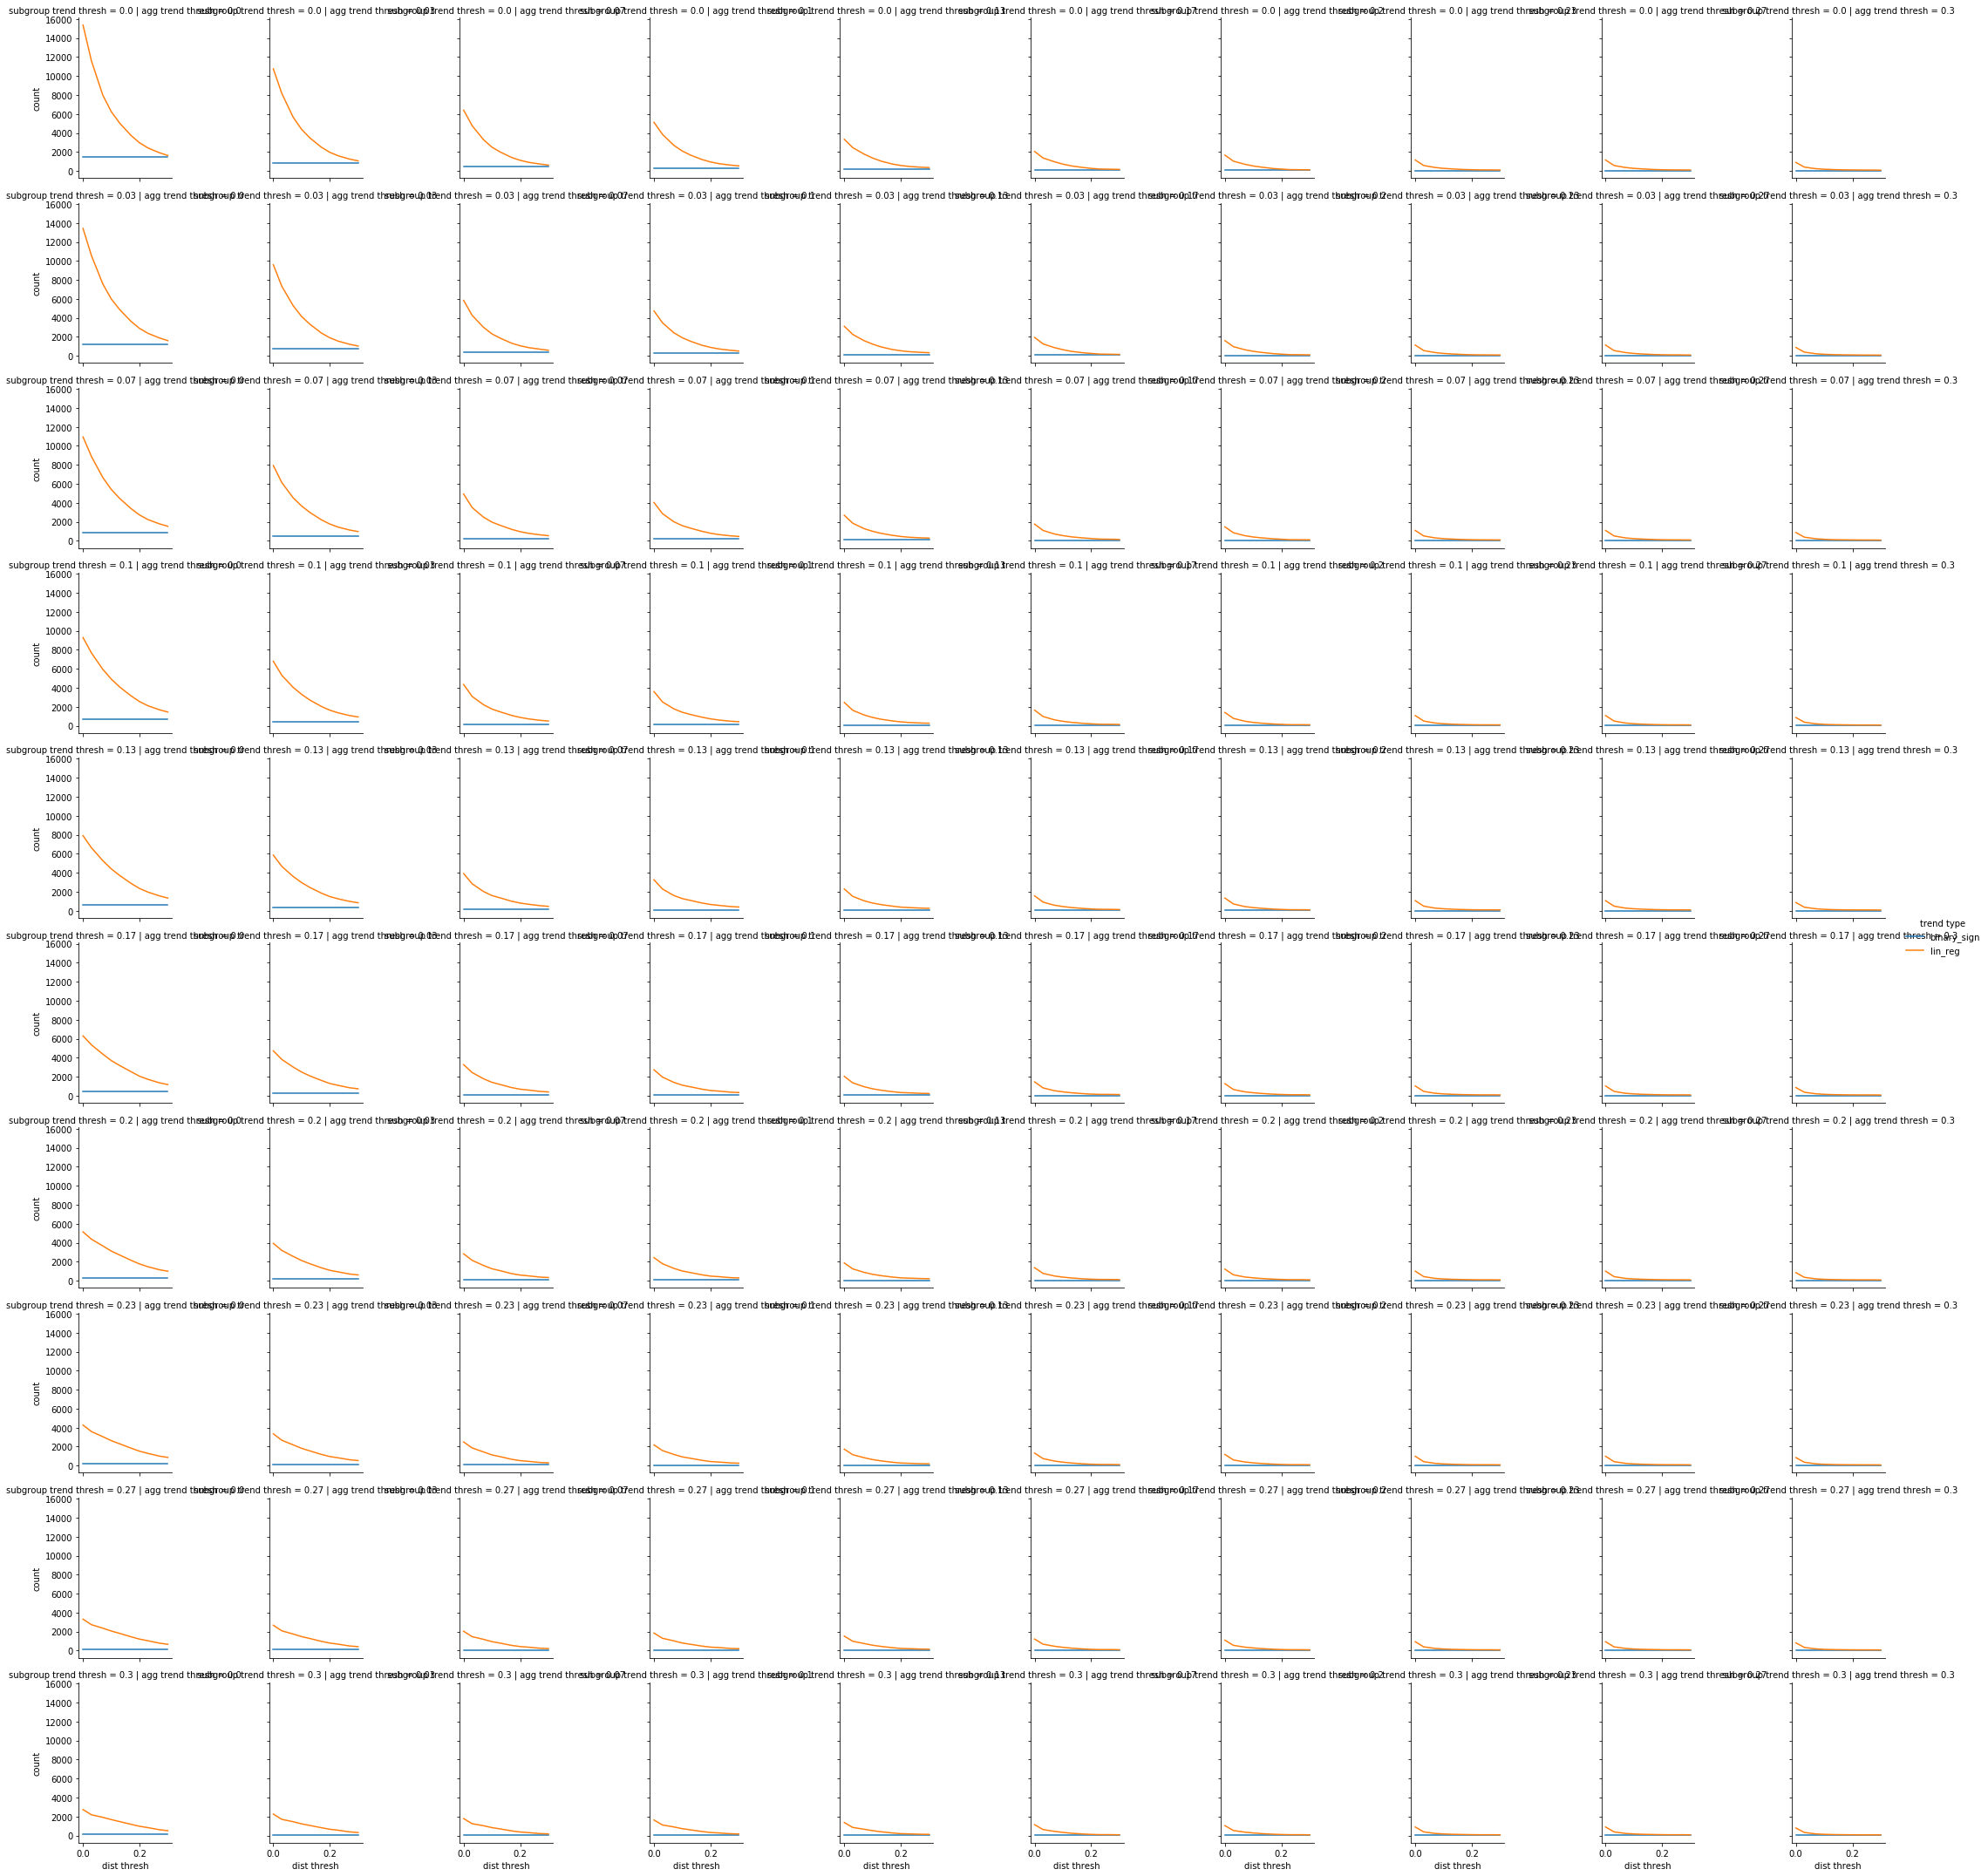

In [24]:
# g = sns.FacetGrid(detection_counts,col = 'aggregate trend threshold', 
#                   row = 'subgroup trend threshold',hue='trend type')
# g = g.map(plt.plot, "distance threshold",'count')

g = sns.FacetGrid(detection_counts,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'])
g = g.map(plt.plot, renamer["th_dist"],'count').add_legend()
# g.map(plt.plot, "th_dist",'lin_reg',c='r')

In [25]:
g = sns.FacetGrid(detection_counts,col = renamer['th_agg'], row = renamer['th_dist'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer["th_sg"],'count').add_legend()
# plt.legend
# g.map(plt.plot, "th_dist",'lin_reg',c='r')

NameError: name 'd' is not defined

In [ ]:
sp_cols = [filt['name'] for filt in sp_filter_list]
n_th = len(threshold_list)
# keep the 0,3,6,9 of each group of 10
end_idx = list(range(0,n_th,3))
n_k = len(end_idx)


keepidx = [a+b+c for a,b,c in zip(end_idx*(n_k*n_k),
                                [bi*10 for bi in end_idx*n_k for i in range(n_k)],
                                 [ci*100 for ci in end_idx for i in range(n_k*n_k)])]


# get the labels
col_subset = [sp_cols[i] for i in keepidx]
#make it bool and filter df
detection_counts_subset = detection_counts[[row in col_subset for row in detection_counts['level_0']] ]



g = sns.FacetGrid(detection_counts_subset,col = renamer['th_agg'], row = renamer['th_dist'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer["th_sg"],'count').add_legend()


# detection_counts_subset.rename(columns = {'th_dist':'distance threshold',
#                                     'th_agg':'aggregate trend threshold','th_sg':'subgroup trend threshold',
#                                   'trend_type':'trend type'},inplace=True)


# g = sns.FacetGrid(detection_counts_subset,col = 'aggregate trend threshold', row = 'distance threshold',
#                   hue='trend type',hue_kws=d)

# g = g.map(plt.plot, "subgroup trend threshold",'count',).add_legend()





In [ ]:
g = sns.FacetGrid(detection_counts_subset,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer["th_dist"],'count').add_legend()

example figures:
- choose a subpanle with multiple regimes
- find one that is in binary, not linear
- find one that is in linear not binary

In [26]:
sp_cols = [filt['name'] for filt in sp_filter_list]
tt_df = labeled_df.result_df.groupby('trend_type')

# for tt, df in tt_df:
#  = detection_counts.unstack().reset_index().rename(columns={0:'count'})
sp_per_view_cols = ['feat1','feat2','group_feat','subgroup']
sp_per_view_cols.extend(sp_cols)
detection_venn_counts = labeled_df.result_df.groupby(sp_per_view_cols)['trend_type'].value_counts().unstack().reset_index()


In [261]:
sp_cols = [filt['name'] for filt in sp_filter_list]
tt_df = labeled_df.result_df.groupby('trend_type')

# for tt, df in tt_df:
#  = detection_counts.unstack().reset_index().rename(columns={0:'count'})
sp_per_view_cols = ['feat1','feat2','group_feat','subgroup']
sp_per_view_cols.extend(sp_cols)
detection_venn_counts = labeled_df.result_df.groupby(sp_per_view_cols)['trend_type'].value_counts().unstack().reset_index()

detection_venn_counts.fillna(0,inplace=True)
detection_venn_counts['both'] = detection_venn_counts[['binary_sign','lin_reg']].prod(axis=1)

detection_venn_counts['binary_sign'] -= detection_venn_counts['both'] 
detection_venn_counts['lin_reg'] -= detection_venn_counts['both'] 


detection_venn_counts['detections'] = detection_venn_counts[['both','binary_sign','lin_reg']].idxmax(axis=1)
# detection_venn_counts['view'] = ['_'.join(r) for r in detection_venn_counts[['feat1','feat2','group_feat','subgroup']].values]
# detection_venn_counts = detection_venn_counts.groupby(['view','detections',])[sp_cols].sum().unstack().reset_index().rename(columns={0:'count'})
# detection_venn_counts.head()


# detection_venn_counts = pd.merge(detection_venn_counts,det_name_th_levs, left_on='trend_type',right_on='level_0',how='left')

detection_venn_counts.head()

trend_type,feat1,feat2,group_feat,subgroup,"qualfilter_SP(0.0,0.0,0.0)","qualfilter_SP(0.0,0.0,0.03)","qualfilter_SP(0.0,0.0,0.07)","qualfilter_SP(0.0,0.0,0.1)","qualfilter_SP(0.0,0.0,0.13)","qualfilter_SP(0.0,0.0,0.17)",...,"qualfilter_SP(0.3,0.3,0.13)","qualfilter_SP(0.3,0.3,0.17)","qualfilter_SP(0.3,0.3,0.2)","qualfilter_SP(0.3,0.3,0.23)","qualfilter_SP(0.3,0.3,0.27)","qualfilter_SP(0.3,0.3,0.3)",binary_sign,lin_reg,both,detections
0,x1,x10,A,A0,True,False,False,False,False,False,...,False,False,False,False,False,False,0.0,4.0,0.0,lin_reg
1,x1,x10,A,A0,True,False,False,False,False,False,...,False,False,False,False,False,False,1.0,0.0,0.0,binary_sign
2,x1,x10,A,A1,True,True,True,True,True,True,...,False,False,False,False,False,False,-3.0,0.0,4.0,both
3,x1,x10,A,A2,True,True,True,False,False,False,...,False,False,False,False,False,False,0.0,4.0,0.0,lin_reg
4,x1,x10,A,A2,True,True,True,False,False,False,...,False,False,False,False,False,False,1.0,0.0,0.0,binary_sign


In [28]:
sp_cols = [filt['name'] for filt in sp_filter_list]



labeled_df.result_df['view'] = ['_'.join(r) for r in labeled_df.result_df[['feat1','feat2','group_feat','subgroup']].values]
# 
# detection_venn_counts = labeled_df.result_df.groupby(['view','trend_type'])[sp_cols].sum()
detection_venn_counts = labeled_df.result_df.groupby(['view','trend_type'])[sp_cols].sum().unstack()



detection_venn_counts.columns = pd.MultiIndex(levels = detection_venn_counts.columns.levels,
                                              codes = detection_venn_counts.columns.codes,
                                              names = ['SP','trend_type'])

detection_venn_counts_both = detection_venn_counts.groupby(level=0,axis=1).prod()
dvc_cols = detection_venn_counts_both.columns
n_dvc = len(dvc_cols)
n_dvc


detection_venn_counts_both.columns = pd.MultiIndex(levels=[dvc_cols,['both']],
                                                  codes=[list(range(n_dvc)),[0]*n_dvc],names = ['SP','trend_type'])
# detection_venn_counts_both.head()

detection_venn_counts = pd.merge(detection_venn_counts,detection_venn_counts_both,left_index=True, right_index=True)
# detection_venn_counts.head()

detection_venn_counts = detection_venn_counts.sum().reset_index().rename(columns={0:'count'})

detection_venn_counts = pd.merge(detection_venn_counts,det_name_th_levs, 
                                 left_on='SP',right_on='level_0',how='left',left_index=True)
detection_venn_counts.head()

,SP,trend_type,count,level_0,th_dist,th_agg,th_sg
0,"qualfilter_SP(0.0,0.0,0.0)",binary_sign,1454.0,"qualfilter_SP(0.0,0.0,0.0)",0.0,0.0,0.00
0,"qualfilter_SP(0.0,0.0,0.0)",lin_reg,15360.0,"qualfilter_SP(0.0,0.0,0.0)",0.0,0.0,0.00
2,"qualfilter_SP(0.0,0.0,0.03)",binary_sign,1215.0,"qualfilter_SP(0.0,0.0,0.03)",0.0,0.0,0.03
2,"qualfilter_SP(0.0,0.0,0.03)",lin_reg,13424.0,"qualfilter_SP(0.0,0.0,0.03)",0.0,0.0,0.03
4,"qualfilter_SP(0.0,0.0,0.07)",binary_sign,889.0,"qualfilter_SP(0.0,0.0,0.07)",0.0,0.0,0.07


In [29]:

renamer= {'th_dist':'distance threshold', 'th_agg':'aggregate thresh','th_sg':'subgroup thresh',
                                  'trend_type':'trend type'}

detection_venn_counts.replace({'binary_sign':'binary sign',
                                    'lin_reg':'linear regression'},inplace=True)

detection_venn_counts.rename(columns = renamer ,inplace=True)
detection_venn_counts.head()

,SP,trend type,count,level_0,distance threshold,aggregate thresh,subgroup thresh
0,"qualfilter_SP(0.0,0.0,0.0)",binary sign,1454.0,"qualfilter_SP(0.0,0.0,0.0)",0.0,0.0,0.00
0,"qualfilter_SP(0.0,0.0,0.0)",linear regression,15360.0,"qualfilter_SP(0.0,0.0,0.0)",0.0,0.0,0.00
2,"qualfilter_SP(0.0,0.0,0.03)",binary sign,1215.0,"qualfilter_SP(0.0,0.0,0.03)",0.0,0.0,0.03
2,"qualfilter_SP(0.0,0.0,0.03)",linear regression,13424.0,"qualfilter_SP(0.0,0.0,0.03)",0.0,0.0,0.03
4,"qualfilter_SP(0.0,0.0,0.07)",binary sign,889.0,"qualfilter_SP(0.0,0.0,0.07)",0.0,0.0,0.07


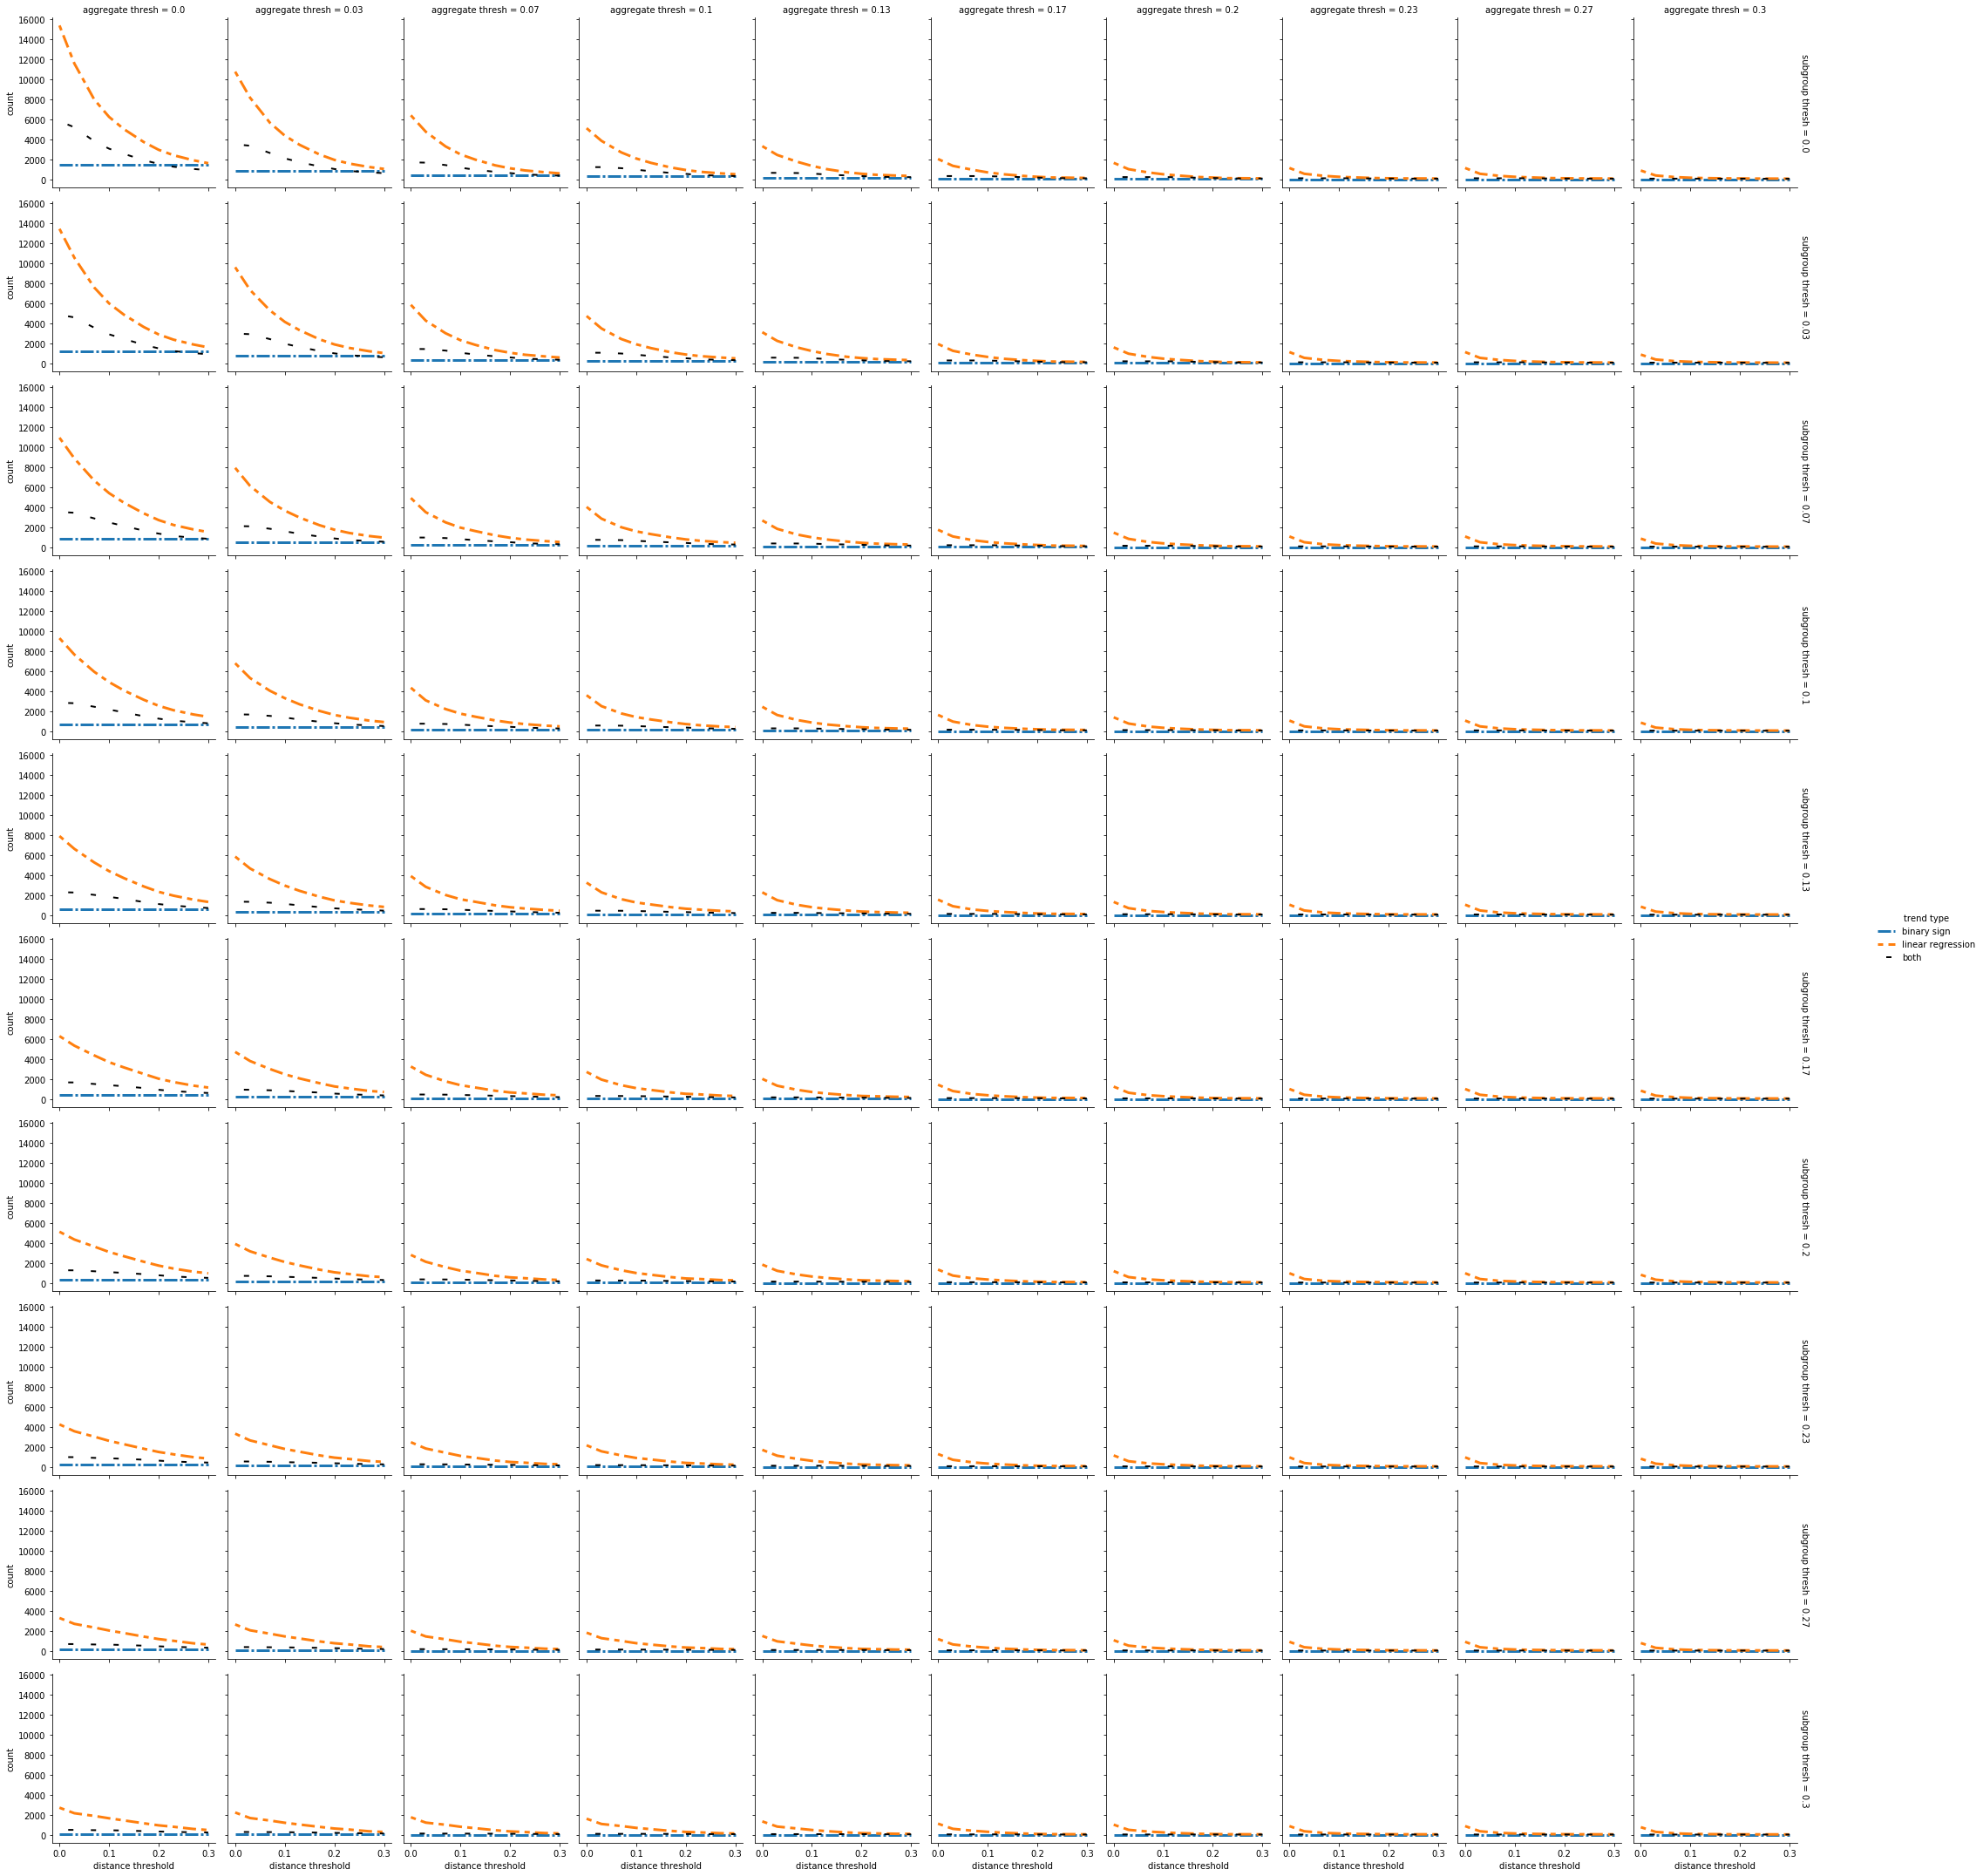

In [30]:
d = {'color': ['C0','C1', 'k'],'lw':[3,3,2],'dashes':[(5,1,1,1),(2,2,5,2),(0,5,3,5)]}
g = sns.FacetGrid(detection_venn_counts,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
# g = g.map(plt.plot, "th_sg",'lin_reg').add_legend()
# plt.legend
# g.map(plt.plot, "th_dist",'lin_reg',c='r')

In [162]:
sp_cols = [filt['name'] for filt in sp_filter_list]
n_th = len(threshold_list)
# keep the 0,3,6,9 of each group of 10
end_idx = list(range(0,n_th,3))
n_k = len(end_idx)


keepidx = [a+b+c for a,b,c in zip(end_idx*(n_th*n_th),
                                  [bi*10 for bi in end_idx*n_th for i in range(n_k)],
                                 [ci*100 for ci in np.repeat(list(range(n_th)),n_k*n_k)])]


#                                 [bi*10 for bi in np.repeat(end_idx,n_k) for i in range(n_th*n_th)]

# get the labels
col_subset = [sp_cols[i] for i in keepidx]
#make it bool and filter df
detection_venn_counts_subset = detection_venn_counts[[row in col_subset for row in detection_venn_counts['level_0']] ]

# detection_counts_subset.head()

In [163]:
keepidx

[0,
 3,
 6,
 9,
 30,
 33,
 36,
 39,
 60,
 63,
 66,
 69,
 90,
 93,
 96,
 99,
 100,
 103,
 106,
 109,
 130,
 133,
 136,
 139,
 160,
 163,
 166,
 169,
 190,
 193,
 196,
 199,
 200,
 203,
 206,
 209,
 230,
 233,
 236,
 239,
 260,
 263,
 266,
 269,
 290,
 293,
 296,
 299,
 300,
 303,
 306,
 309,
 330,
 333,
 336,
 339,
 360,
 363,
 366,
 369,
 390,
 393,
 396,
 399,
 400,
 403,
 406,
 409,
 430,
 433,
 436,
 439,
 460,
 463,
 466,
 469,
 490,
 493,
 496,
 499,
 500,
 503,
 506,
 509,
 530,
 533,
 536,
 539,
 560,
 563,
 566,
 569,
 590,
 593,
 596,
 599,
 600,
 603,
 606,
 609,
 630,
 633,
 636,
 639,
 660,
 663,
 666,
 669,
 690,
 693,
 696,
 699,
 700,
 703,
 706,
 709,
 730,
 733,
 736,
 739,
 760,
 763,
 766,
 769,
 790,
 793,
 796,
 799,
 800,
 803,
 806,
 809,
 830,
 833,
 836,
 839,
 860,
 863,
 866,
 869,
 890,
 893,
 896,
 899,
 900,
 903,
 906,
 909,
 930,
 933,
 936,
 939,
 960,
 963,
 966,
 969,
 990,
 993,
 996,
 999]

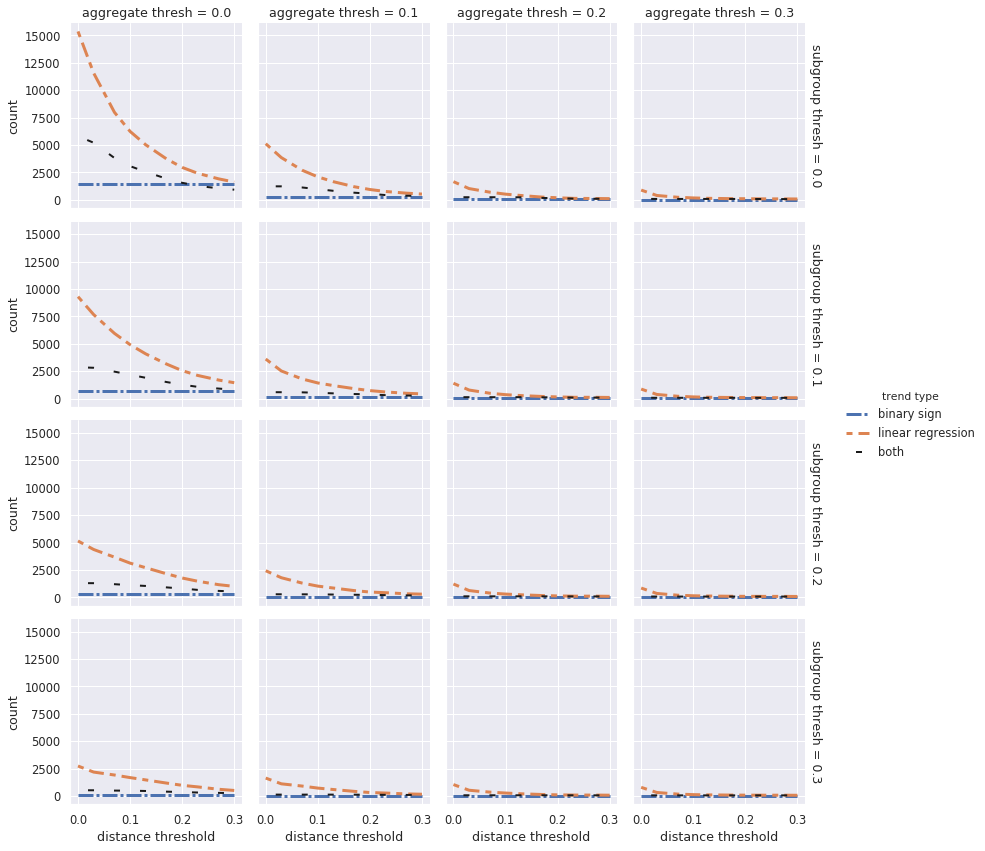

In [164]:
d = {'color': ['C0','C1', 'k'],'lw':[3,3,2],'dashes':[(5,1,1,1),(2,2,5,2),(0,5,3,5)]}
g = sns.FacetGrid(detection_venn_counts_subset,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
# g = g.map(plt.plot, "th_sg",'lin_reg').add_legend()
# plt.legend
# g.map(plt.plot, "th_dist",'lin_reg',c='r')

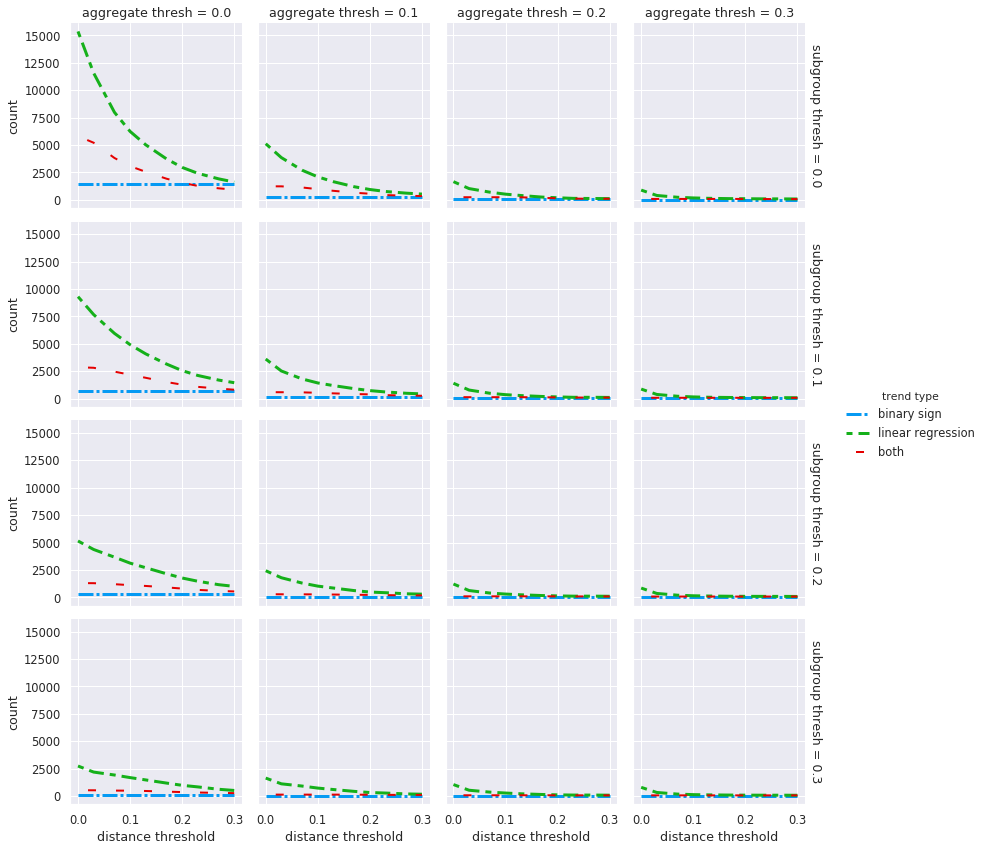

In [165]:
d = {'color': ['xkcd:azure','xkcd:green','xkcd:red'],'lw':[3,3,2],'dashes':[(5,1,1,1),(2,2,5,2),(0,5,4,5)]}
g = sns.FacetGrid(detection_venn_counts_subset,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
# g = g.map(plt.plot, "th_sg",'lin_reg').add_legend()
# plt.legend
# g.map(plt.plot, "th_dist",'lin_reg',c='r')

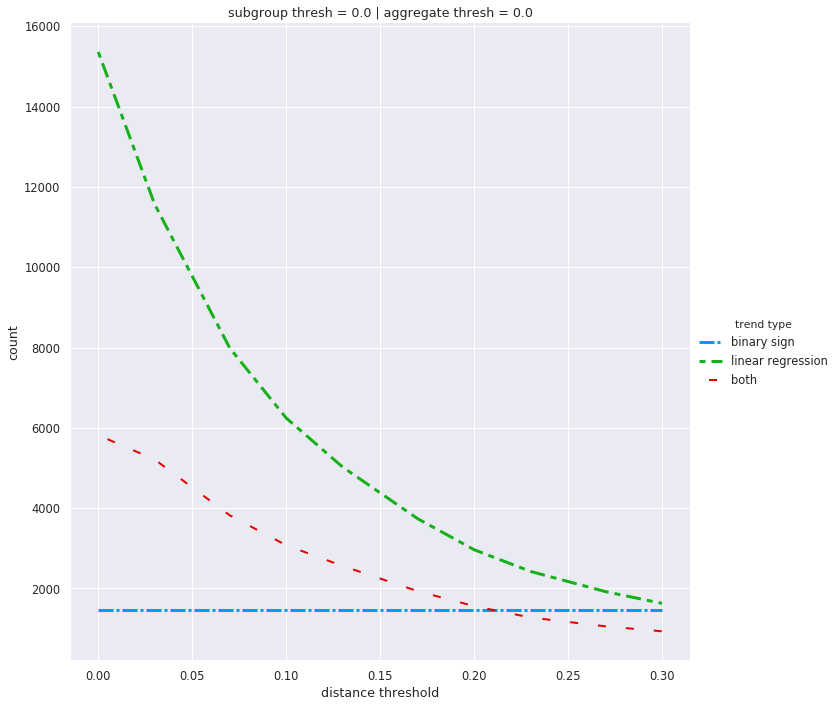

In [171]:
agg_rows = detection_venn_counts[renamer['th_agg']]==0
sg_rows = detection_venn_counts[renamer['th_sg']]==0

highlight_data = detection_venn_counts[agg_rows & sg_rows]
d = {'color': ['xkcd:azure','xkcd:green','xkcd:red'],'lw':[3,3,2],'dashes':[(5,1,1,1),(2,2,5,2),(0,5,4,5)]}
g = sns.FacetGrid(highlight_data,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d, height=10, aspect=1)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
# plt.plot(highlight_data[renamer['th_dist']],highlight_data['count'])

# sns.lmplot(renamer['th_dist'],'count',data =highlight_data, hue='trend type',ci=None,fit_reg=False)

In [168]:
highlight_data.shape

(30, 7)

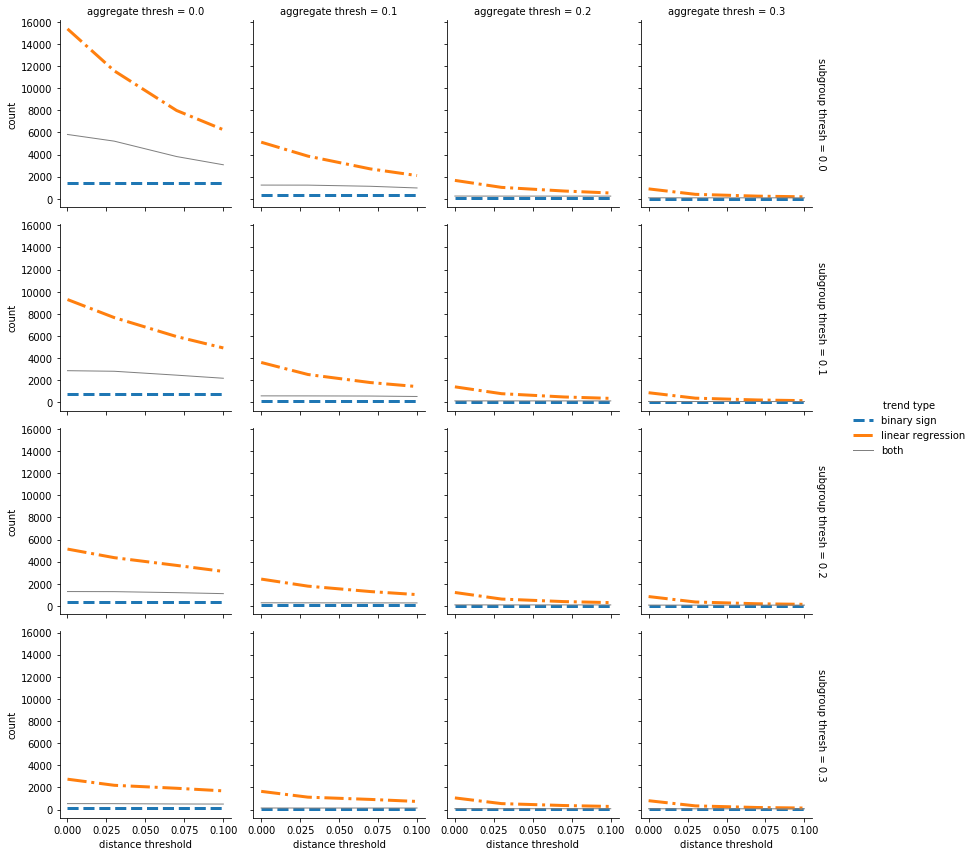

In [34]:
d = {'color': ['C0', 'C1','grey'], "ls" : ["--","-.",'-'],'lw':[3,3,1]}
g = sns.FacetGrid(detection_venn_counts_subset,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
# g = g.map(plt.plot, "th_sg",'lin_reg').add_legend()
# plt.legend
# g.map(plt.plot, "th_dist",'lin_reg',c='r')

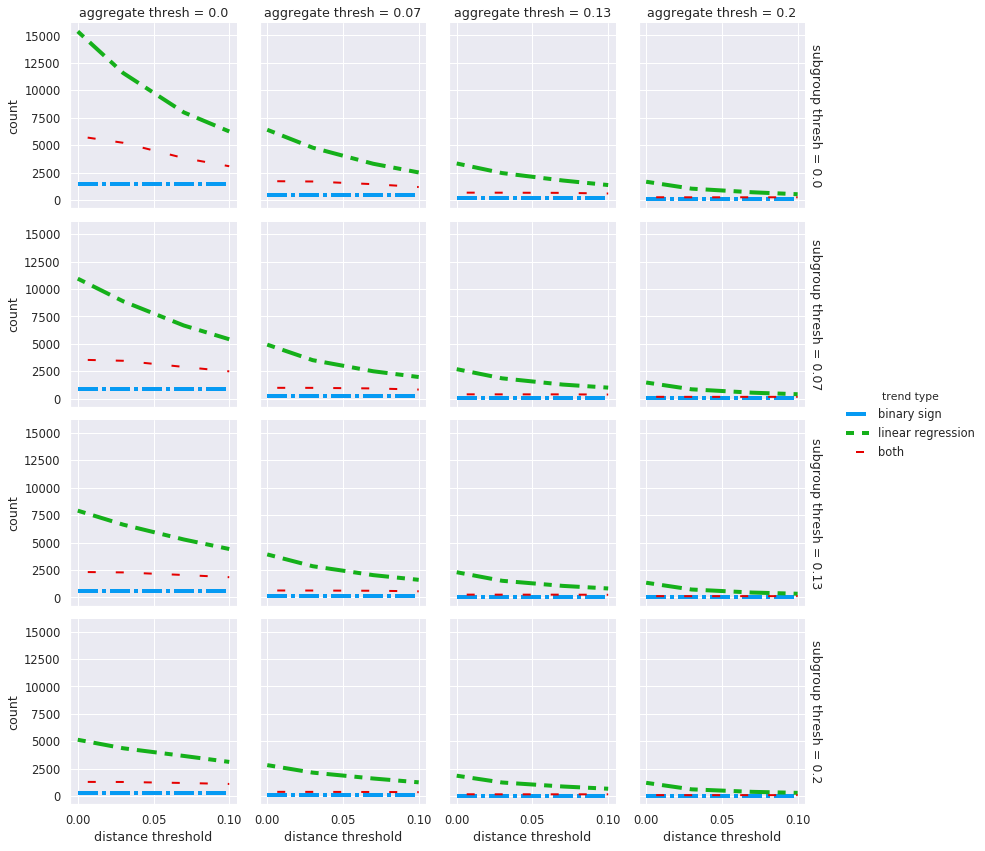

In [41]:
sp_cols = [filt['name'] for filt in sp_filter_list]
n_th = len(threshold_list)
# keep the 0,3,6,9 of each group of 10
end_idx = [0,2,4,6]
n_k = len(end_idx)


keepidx = [a+b+c for a,b,c in zip(end_idx*(n_k*n_k), #use 4 agg
                                [bi*10 for bi in end_idx*n_k for i in range(n_k)], #use 4 sg
                                 [ci*100 for ci in range(n_th) for i in range(n_k*n_k)])] #keep all dist



# get the labels
col_subset = [sp_cols[i] for i in keepidx]
#make it bool and filter df
detection_venn_counts_subset = detection_venn_counts[[row in col_subset for row in detection_venn_counts['level_0']] ]

# detection_counts_subset.head()

d = {'color': ['xkcd:azure','xkcd:green','xkcd:red'],'lw':[4,4,2],'dashes':[(5,1,1,1),(2,2,5,2),(0,5,4,5)]}
g = sns.FacetGrid(detection_venn_counts_subset,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
# g = g.map(plt.plot, "th_sg",'lin_reg').add_legend()
# plt.legend
# g.map(plt.plot, "th_dist",'lin_reg',c='r')

In [36]:
sp_cols = [filt['name'] for filt in sp_filter_list]
n_th = len(threshold_list)
# keep the 0,3,6,9 of each group of 10
end_idx_agg = [0,3,6]
end_idx_sg = [0,3,6,9]
n_k = len(end_idx_agg)


keepidx = [a+b+c for a,b,c in zip(end_idx_sg*(n_th*n_th), #use 4 agg
                                [bi*10 for bi in end_idx_agg*n_th for i in range(n_th)], #use 4 sg
                                 [ci*100 for ci in range(n_th) for i in range(n_th*n_k)])] #keep all dist



# get the labels
col_subset = [sp_cols[i] for i in keepidx]

In [37]:
[bi*10 for bi in end_idx_agg*n_th for i in range(n_th)]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 0,
 0,
 0,
 0,
 0,


In [38]:
len([ci*100 for ci in range(n_th) for i in range(n_th*n_k)])

300

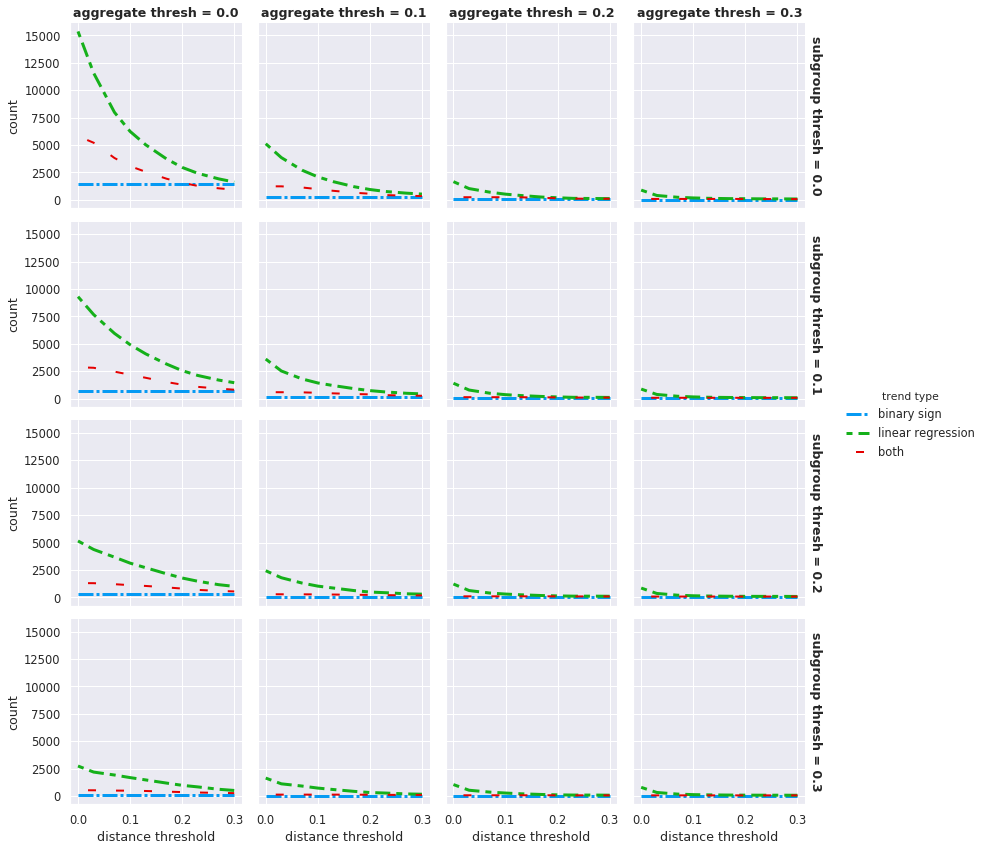

In [172]:
#make it bool and filter df
detection_venn_counts_subset = detection_venn_counts[[row in col_subset for row in detection_venn_counts['level_0']] ]

# detection_counts_subset.head()
sns.set(font_scale=1.05) # ,style='white'
d = {'color': ['xkcd:azure','xkcd:green','xkcd:red'],'lw':[3,3,2],'dashes':[(5,1,1,1),(2,2,5,2),(0,5,4,5)]}
g = sns.FacetGrid(detection_venn_counts_subset,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d,margin_titles=True)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
g.set_titles(fontweight='bold')
# g = g.map(plt.plot, "th_sg",'lin_reg').add_legend()
# plt.legend
# g.map(plt.plot, "th_dist",'lin_reg',c='r')

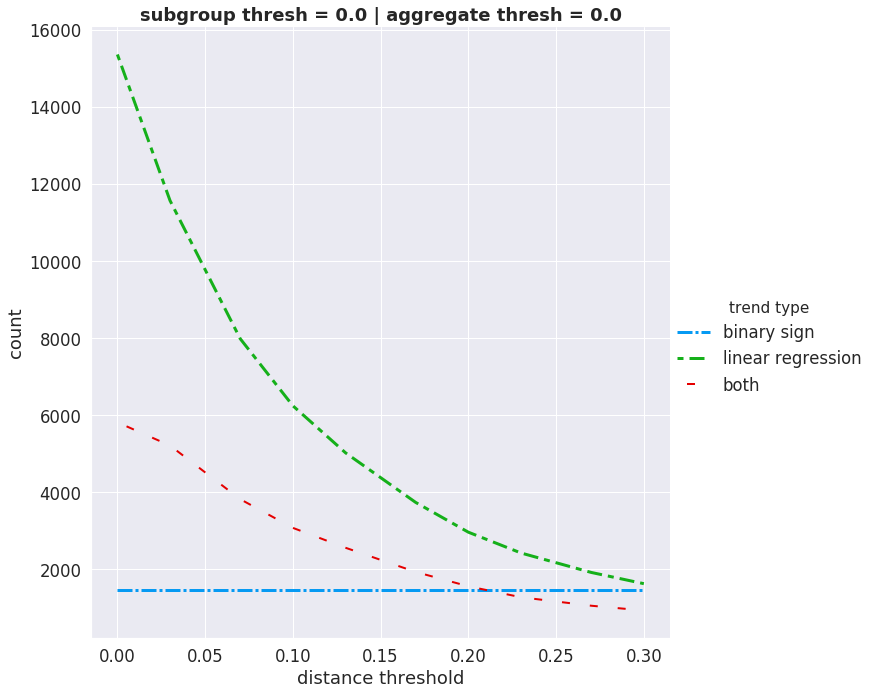

In [180]:
agg_rows = detection_venn_counts[renamer['th_agg']]==0
sg_rows = detection_venn_counts[renamer['th_sg']]==0

sns.set(font_scale=1.5)
highlight_data = detection_venn_counts[agg_rows & sg_rows]
d = {'color': ['xkcd:azure','xkcd:green','xkcd:red'],'lw':[3,3,2],'dashes':[(5,1,1,1),(2,2,5,2),(0,5,4,5)]}
g = sns.FacetGrid(highlight_data,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d, height=10, aspect=1)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
g.set_titles(fontweight='bold')

# plt.plot(highlight_data[renamer['th_dist']],highlight_data['count'])

# sns.lmplot(renamer['th_dist'],'count',data =highlight_data, hue='trend type',ci=None,fit_reg=False)

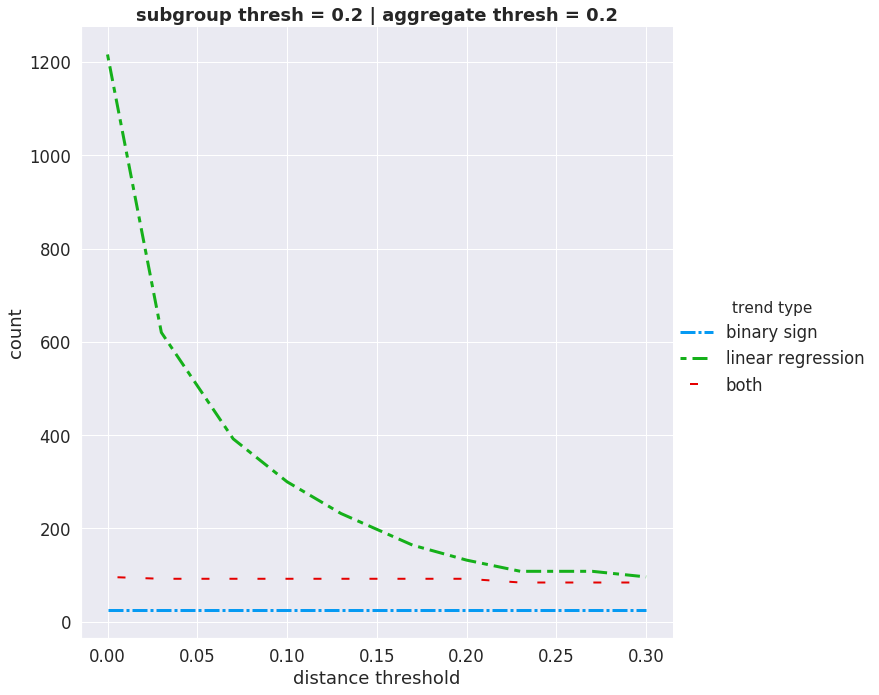

In [260]:
agg_rows = detection_venn_counts[renamer['th_agg']]==0.2
sg_rows = detection_venn_counts[renamer['th_sg']]==0.2

sns.set(font_scale=1.5)
highlight_data = detection_venn_counts[agg_rows & sg_rows]
d = {'color': ['xkcd:azure','xkcd:green','xkcd:red'],'lw':[3,3,2],'dashes':[(5,1,1,1),(2,2,5,2),(0,5,4,5)]}
g = sns.FacetGrid(highlight_data,col = renamer['th_agg'], row = renamer['th_sg'],
                  hue=renamer['trend_type'],hue_kws=d, height=10, aspect=1)
g = g.map(plt.plot, renamer['th_dist'],'count').add_legend()
g.set_titles(fontweight='bold')

# plt.plot(highlight_data[renamer['th_dist']],highlight_data['count'])

# sns.lmplot(renamer['th_dist'],'count',data =highlight_data, hue='trend type',ci=None,fit_reg=False)

In [188]:
view_counts_by_type = labeled_df.result_df.groupby(['view','trend_type'])[sp_cols].sum().reset_index()
view_counts_by_type.head()

,view,trend_type,"qualfilter_SP(0.0,0.0,0.0)","qualfilter_SP(0.0,0.0,0.03)","qualfilter_SP(0.0,0.0,0.07)","qualfilter_SP(0.0,0.0,0.1)","qualfilter_SP(0.0,0.0,0.13)","qualfilter_SP(0.0,0.0,0.17)","qualfilter_SP(0.0,0.0,0.2)","qualfilter_SP(0.0,0.0,0.23)",...,"qualfilter_SP(0.3,0.3,0.0)","qualfilter_SP(0.3,0.3,0.03)","qualfilter_SP(0.3,0.3,0.07)","qualfilter_SP(0.3,0.3,0.1)","qualfilter_SP(0.3,0.3,0.13)","qualfilter_SP(0.3,0.3,0.17)","qualfilter_SP(0.3,0.3,0.2)","qualfilter_SP(0.3,0.3,0.23)","qualfilter_SP(0.3,0.3,0.27)","qualfilter_SP(0.3,0.3,0.3)"
0,x10_x11_A_A0,binary_sign,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,x10_x11_A_A0,lin_reg,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,x10_x11_A_A1,binary_sign,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,x10_x11_A_A1,lin_reg,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,x10_x11_A_A2,binary_sign,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
view_counts_by_type.shape

(7680, 1002)

In [255]:
target_thresh_views = view_counts_by_type[view_counts_by_type['qualfilter_SP(0.0,0.0,0.0)'] >1]

In [256]:
target_thresh_views

,view,trend_type,"qualfilter_SP(0.0,0.0,0.0)","qualfilter_SP(0.0,0.0,0.03)","qualfilter_SP(0.0,0.0,0.07)","qualfilter_SP(0.0,0.0,0.1)","qualfilter_SP(0.0,0.0,0.13)","qualfilter_SP(0.0,0.0,0.17)","qualfilter_SP(0.0,0.0,0.2)","qualfilter_SP(0.0,0.0,0.23)",...,"qualfilter_SP(0.3,0.3,0.0)","qualfilter_SP(0.3,0.3,0.03)","qualfilter_SP(0.3,0.3,0.07)","qualfilter_SP(0.3,0.3,0.1)","qualfilter_SP(0.3,0.3,0.13)","qualfilter_SP(0.3,0.3,0.17)","qualfilter_SP(0.3,0.3,0.2)","qualfilter_SP(0.3,0.3,0.23)","qualfilter_SP(0.3,0.3,0.27)","qualfilter_SP(0.3,0.3,0.3)"
1,x10_x11_A_A0,lin_reg,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,x10_x11_A_A1,lin_reg,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,x10_x11_A_A2,lin_reg,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,x10_x11_A_A3,lin_reg,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,x10_x11_A_A4,lin_reg,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,x10_x11_B_B0,lin_reg,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,x10_x11_B_B1,lin_reg,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,x10_x11_B_B2,lin_reg,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,x10_x11_C_C0,lin_reg,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,x10_x11_C_C1,lin_reg,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
set([tuple(a.split('_')[:2]) for a in target_thresh_views['view']])

{('x1', 'x10'),
 ('x1', 'x11'),
 ('x1', 'x12'),
 ('x1', 'x13'),
 ('x1', 'x14'),
 ('x1', 'x15'),
 ('x1', 'x16'),
 ('x1', 'x2'),
 ('x1', 'x3'),
 ('x1', 'x4'),
 ('x1', 'x5'),
 ('x1', 'x6'),
 ('x1', 'x7'),
 ('x1', 'x8'),
 ('x1', 'x9'),
 ('x10', 'x11'),
 ('x10', 'x12'),
 ('x10', 'x13'),
 ('x10', 'x14'),
 ('x10', 'x15'),
 ('x10', 'x16'),
 ('x11', 'x12'),
 ('x11', 'x13'),
 ('x11', 'x14'),
 ('x11', 'x15'),
 ('x11', 'x16'),
 ('x12', 'x13'),
 ('x12', 'x14'),
 ('x12', 'x15'),
 ('x12', 'x16'),
 ('x13', 'x14'),
 ('x13', 'x15'),
 ('x13', 'x16'),
 ('x14', 'x15'),
 ('x14', 'x16'),
 ('x15', 'x16'),
 ('x2', 'x10'),
 ('x2', 'x11'),
 ('x2', 'x12'),
 ('x2', 'x13'),
 ('x2', 'x14'),
 ('x2', 'x15'),
 ('x2', 'x16'),
 ('x2', 'x3'),
 ('x2', 'x4'),
 ('x2', 'x5'),
 ('x2', 'x6'),
 ('x2', 'x7'),
 ('x2', 'x8'),
 ('x2', 'x9'),
 ('x3', 'x10'),
 ('x3', 'x11'),
 ('x3', 'x12'),
 ('x3', 'x13'),
 ('x3', 'x14'),
 ('x3', 'x15'),
 ('x3', 'x16'),
 ('x3', 'x4'),
 ('x3', 'x5'),
 ('x3', 'x6'),
 ('x3', 'x7'),
 ('x3', 'x8'),
 ('x3',

In [258]:
set([a for a in target_thresh_views['view'] if 'x12' in a])

{'x10_x12_A_A0',
 'x10_x12_A_A1',
 'x10_x12_A_A2',
 'x10_x12_A_A3',
 'x10_x12_A_A4',
 'x10_x12_B_B0',
 'x10_x12_B_B1',
 'x10_x12_B_B2',
 'x10_x12_C_C0',
 'x10_x12_C_C1',
 'x10_x12_C_C2',
 'x10_x12_C_C3',
 'x10_x12_C_C4',
 'x10_x12_C_C5',
 'x10_x12_D_D0',
 'x10_x12_D_D1',
 'x10_x12_D_D2',
 'x10_x12_D_D3',
 'x10_x12_E_E0',
 'x10_x12_E_E1',
 'x10_x12_F_F0',
 'x10_x12_F_F1',
 'x10_x12_F_F2',
 'x10_x12_G_G0',
 'x10_x12_G_G1',
 'x10_x12_G_G2',
 'x10_x12_G_G3',
 'x10_x12_H_H0',
 'x10_x12_H_H1',
 'x10_x12_H_H2',
 'x10_x12_H_H3',
 'x10_x12_H_H4',
 'x11_x12_A_A0',
 'x11_x12_A_A1',
 'x11_x12_A_A2',
 'x11_x12_A_A3',
 'x11_x12_A_A4',
 'x11_x12_B_B0',
 'x11_x12_B_B1',
 'x11_x12_B_B2',
 'x11_x12_C_C0',
 'x11_x12_C_C1',
 'x11_x12_C_C2',
 'x11_x12_C_C3',
 'x11_x12_C_C4',
 'x11_x12_C_C5',
 'x11_x12_D_D0',
 'x11_x12_D_D1',
 'x11_x12_D_D2',
 'x11_x12_D_D3',
 'x11_x12_E_E0',
 'x11_x12_E_E1',
 'x11_x12_F_F0',
 'x11_x12_F_F1',
 'x11_x12_F_F2',
 'x11_x12_G_G0',
 'x11_x12_G_G1',
 'x11_x12_G_G2',
 'x11_x12_G_G3

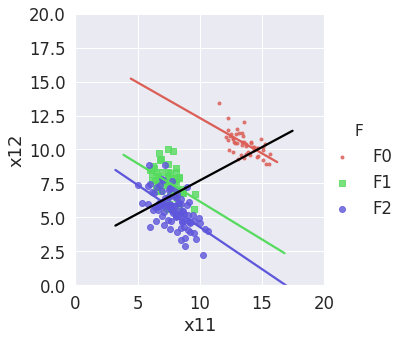

In [252]:
labeled_df.sp_plot('x11','x12','F')

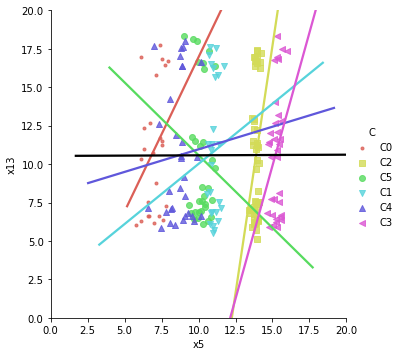

In [16]:
# look at the first of the random selection
view_to_plot = view_sample_dist.loc[view_sample_dist.index[0],['feat1','feat2','group_feat']]

labeled_df.sp_plot(*view_to_plot)

In [108]:
col_subset

['qualfilter_SP(0.0,0.0,0.0)',
 'qualfilter_SP(0.0,0.0,0.1)',
 'qualfilter_SP(0.0,0.0,0.2)',
 'qualfilter_SP(0.0,0.0,0.0)',
 'qualfilter_SP(0.0,0.0,0.1)',
 'qualfilter_SP(0.0,0.0,0.2)',
 'qualfilter_SP(0.0,0.0,0.0)',
 'qualfilter_SP(0.0,0.0,0.1)',
 'qualfilter_SP(0.0,0.0,0.2)',
 'qualfilter_SP(0.0,0.0,0.0)',
 'qualfilter_SP(0.0,0.1,0.1)',
 'qualfilter_SP(0.0,0.1,0.2)',
 'qualfilter_SP(0.0,0.1,0.0)',
 'qualfilter_SP(0.0,0.1,0.1)',
 'qualfilter_SP(0.0,0.1,0.2)',
 'qualfilter_SP(0.0,0.1,0.0)',
 'qualfilter_SP(0.0,0.1,0.1)',
 'qualfilter_SP(0.0,0.1,0.2)',
 'qualfilter_SP(0.0,0.1,0.0)',
 'qualfilter_SP(0.0,0.1,0.1)',
 'qualfilter_SP(0.0,0.2,0.2)',
 'qualfilter_SP(0.0,0.2,0.0)',
 'qualfilter_SP(0.0,0.2,0.1)',
 'qualfilter_SP(0.0,0.2,0.2)',
 'qualfilter_SP(0.0,0.2,0.0)',
 'qualfilter_SP(0.0,0.2,0.1)',
 'qualfilter_SP(0.0,0.2,0.2)',
 'qualfilter_SP(0.0,0.2,0.0)',
 'qualfilter_SP(0.0,0.2,0.1)',
 'qualfilter_SP(0.0,0.2,0.2)',
 'qualfilter_SP(0.0,0.0,0.0)',
 'qualfilter_SP(0.0,0.0,0.1)',
 'qualfi

# Misc leftover stuff possibly to be reused, possibly deleted

We get a lot of reslts, but a lot are for weak trends

Many fewer, and with a threshold on aggregate trend strength, even fewer. We can visually inspect some of the trends that only the binary detector finds and that only the distance based finds

In [ ]:
detection_counts = labeled_df.result_df.groupby('trend_type')[sp_cols].sum()
detection_counts = detection_counts.unstack().reset_index().rename(columns={0:'count'})


# [nm[14:-1].split(',') for nm in detection_counts.index]
th_cols = pd.DataFrame(data=np.repeat([[td,ta,ts] for td,ta,ts in itertools.product(threshold_list,threshold_list,
                                                                          threshold_list)],2,axis=0),
                       columns = ['th_dist','th_agg','th_sg'],index = detection_counts.index)
detection_counts = pd.concat([detection_counts,th_cols],axis=1)
detection_counts.head()

sp_cols = [filt['name'] for filt in sp_filter_list]
detection_counts = labeled_df.result_df.groupby('trend_type')[sp_cols].sum()
detection_counts = detection_counts.unstack().reset_index().rename(columns={0:'count'})


# [nm[14:-1].split(',') for nm in detection_counts.index]
th_cols = pd.DataFrame(data=np.repeat([[td,ta,ts] for td,ta,ts in itertools.product(threshold_list,threshold_list,
                                                                          threshold_list)],2,axis=0),
                       columns = ['th_dist','th_agg','th_sg'],index = detection_counts.index)
detection_counts = pd.concat([detection_counts,th_cols],axis=1)
# save just the colname to 3 parts mapping
det_name_th_levs = detection_counts[['level_0','th_dist','th_agg','th_sg']].drop_duplicates()
detection_counts.head()

base_sp = {'name':'binary_SP','distance':0.0}
threshold_list = [float(np.round(th,2)) for th in np.linspace(0,.3,num=10)]
mk_name = lambda th_ls: [str(np.round(th,2)) for th in th_ls]
distance_sp_thresh =  [{'name':'distance_SP'+str(np.round(th,2)),'distance':th} for th in threshold_list]

quality_sp_thresh = [{'name':'qualfilter_SP'+'('+','.join(mk_name([td,ta,ts]))+')',
                      'distance':td,'agg_trend_quality':ta,
                      'subgroup_trend_quality':ts} 
                     for td,ta,ts in itertools.product(threshold_list,threshold_list,threshold_list)]
sp_filter_list = quality_sp_thresh.copy()

In [ ]:
dist_only = [d for d in dist_det if not(d in bin_det)]
print(len(dist_only))
cursel = np.random.random_integers(len(dist_only)) -1
view_to_plot = labeled_df_dist.result_df.loc[dist_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_dist.result_df.loc[dist_only[cursel],'subgroup']

labeled_df_dist.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_dist.result_df.loc[dist_only[cursel]]

The trends that only the distance finds are cases where the subgroup trend is the same sign as aggregate, but significantly different.  So, we find fewer overall and additional interesting trends that binary sign change cannot find. 

In [ ]:
# we can check how many in each case were designed in, once we filter in the labeled df ro explose get views for a dtafram
n_view = 8
# in this synthetic dataset we know the structure of the SP designed views
designed_view_list = [('x'+str(i+1),'x'+str(i+2),c) for i,c in 
                      zip(range(0,n_view*2,2),list(string.ascii_uppercase[:n_view]))]
num_designed_views = len(designed_view_list)

# passing the name of the SP we already detected, doesn't compute the detection over, it filters by that column
found_sp_views_bin = labeled_df_bin.get_SP_views('SP_qualfilt',colored=True)
found_sp_views_dist = labeled_df_dist.get_SP_views('SP_qualfilt',colored=True)

In [ ]:
# of designed, how many were found
detections_bin = [v for v in designed_view_list if v in found_sp_views_bin]
num_detections_bin = len(detections_bin)
# of found, how many were not designed
undesigned_bin = [v for v in found_sp_views_bin if not(v in designed_view_list)]
num_undesigned_bin = len(undesigned_bin)
print('Success Rate: ',num_detections_bin /num_designed_views)
print('Novel Discoveries of detections: ',num_undesigned_bin /len(found_sp_views_bin))

In [ ]:
# of designed, how many were found
detections_dist = [v for v in designed_view_list if v in found_sp_views_dist]
num_detections_dist = len(detections_dist)
# of found, how many were not designed
undesigned_dist = [v for v in found_sp_views_dist if not(v in designed_view_list)]
num_undesigned_dist = len(undesigned_dist)
print('Success Rate: ',num_detections_dist /num_designed_views)
print('Novel Discoveries: ',num_undesigned_dist /len(found_sp_views_dist))

Some of the designed views may not have any SP, due to the random nature and the quality threshold

In [ ]:
missed_list = [v for v in designed_view_list if not(v in found_sp_views_dist) and not(v in found_sp_views_bin)]

missed_row_df = []
for view_to_plot in missed_list:
    labeled_df_dist.sp_plot(*view_to_plot)
    missed_row_df.append(labeled_df_dist.get_trend_rows(*view_to_plot))
    
feat1_missed,feat2_missed,groupby_missed = zip(*missed_list)
# labeled_df_dist.get_trend_rows(feat1_missed,feat2_missed,groupby_missed)
pd.concat(missed_row_df)

By inspection, we see that the missed ones are all weak in either aggregate or subgroup trend.  Even if there is a reversal, weak trends shouldn't be used to make decsions anyway, so these are not important for further exploration

In [ ]:
view_to_plot = random.choice(undesigned_bin)
labeled_df_bin.sp_plot(*view_to_plot)

In [ ]:
view_to_plot = random.choice(undesigned_bin)
labeled_df_bin.sp_plot(*view_to_plot)

In [ ]:
view_to_plot = random.choice(undesigned_dist)
labeled_df_dist.sp_plot(*view_to_plot)

In [ ]:
view_to_plot = random.choice(undesigned_dist)
labeled_df_dist.sp_plot(*view_to_plot)

For the continuous-valued, we can futher filter 

## Rank SP

# Two types of SP

In [ ]:
np.prod([True, True, True])

In [ ]:
filter_thresh = {'distance':0,'agg_trend_quality':0,'subgroup_trend_quality':0}
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

labeled_df_bin.result_df[labeled_df_bin.result_df.apply(q_filter,axis=1)]

In [ ]:
filter_thresh = {'distance':.2,'agg_trend_quality':.15,'subgroup_trend_quality':0,'name':'def'}
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

In [ ]:

filter_thresh = quality_filters.copy()
filter_thresh.pop('name')

In [ ]:
q_filter = lambda row: bool(np.prod([row[k]>v for k,v in filter_thresh.items()]))

len(labeled_df_dist.result_df[labeled_df_dist.result_df.apply(q_filter,axis=1)])